In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
T = 256
shift = 22.3
periods = np.array([T, T/2, T/3, T/4, T/5, T/6])
s = []
for p in periods:
    a = []
    for k in range(T):
        a.append( np.exp(1j*2*np.pi*(k+shift)/p))
    s.append(a)
s = np.array(s)

In [4]:
s.shape

(6, 256)

In [5]:
a = s[0]
a.shape

(256,)

In [6]:
b=s[1]

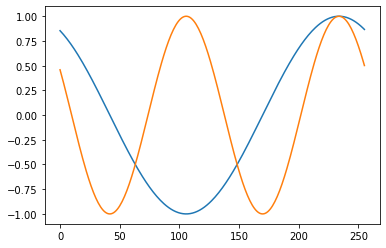

In [7]:
plt.plot(a.real)
plt.plot(b.real)

### The two signal vectors are orthogonal, independent of the amount of shift

In [8]:
d = a.dot(b)

In [9]:
d

(9.823319407171858e-15+3.300754863449361e-16j)

In [10]:
np.absolute(d)

9.828863311797814e-15

## complex inner products

In [11]:
for i in range(len(periods)-1):
    for j in range(i+1, len(periods)):
        a = s[i]
        b = s[j]
        print ('dot ', i, j, np.round(np.absolute(a.dot(b)), 5))

dot  0 1 0.0
dot  0 2 0.0
dot  0 3 0.0
dot  0 4 0.0
dot  0 5 0.0
dot  1 2 0.0
dot  1 3 0.0
dot  1 4 0.0
dot  1 5 0.0
dot  2 3 0.0
dot  2 4 0.0
dot  2 5 0.0
dot  3 4 0.0
dot  3 5 0.0
dot  4 5 0.0


## inner product of real parts

In [12]:
for i in range(len(periods)-1):
    for j in range(i+1, len(periods)):
        a = s[i].real
        b = s[j].real
        print ('dot ', i, j, np.round(np.absolute(a.dot(b)), 5))

dot  0 1 0.0
dot  0 2 0.0
dot  0 3 0.0
dot  0 4 0.0
dot  0 5 0.0
dot  1 2 0.0
dot  1 3 0.0
dot  1 4 0.0
dot  1 5 0.0
dot  2 3 0.0
dot  2 4 0.0
dot  2 5 0.0
dot  3 4 0.0
dot  3 5 0.0
dot  4 5 0.0


## inner product of imaginary parts

In [13]:
for i in range(len(periods)-1):
    for j in range(i+1, len(periods)):
        a = s[i].imag
        b = s[j].imag
        print ('dot ', i, j, np.round(np.absolute(a.dot(b)), 5))

dot  0 1 0.0
dot  0 2 0.0
dot  0 3 0.0
dot  0 4 0.0
dot  0 5 0.0
dot  1 2 0.0
dot  1 3 0.0
dot  1 4 0.0
dot  1 5 0.0
dot  2 3 0.0
dot  2 4 0.0
dot  2 5 0.0
dot  3 4 0.0
dot  3 5 0.0
dot  4 5 0.0


/home/yndk/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


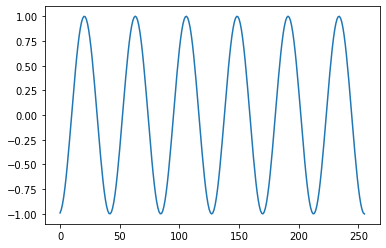

In [14]:
plt.plot(s[-1])

## DCT, JPEG, MPEG
- https://crynut84.tistory.com/61
- https://cs.stanford.edu/people/eroberts/courses/soco/projects/data-compression/lossy/jpeg/dct.htm

In [15]:
c = np.empty((8,8))

In [16]:
N = 8
for k in range(N):
    for n in range(N):
        if k == 0:
            c[k,n] = 1/np.sqrt(N)
        else:
            c[k,n] = np.sqrt(2/N) * np.cos( k * np.pi * (2*n+1) / (2*N) )

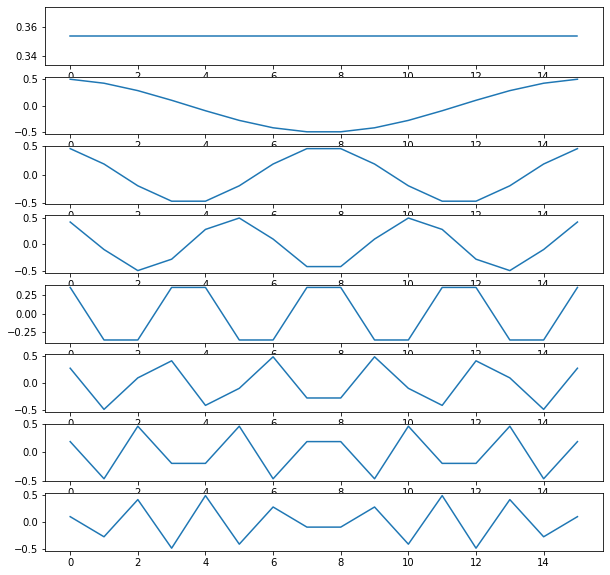

In [17]:
fig, axes = plt.subplots(8, figsize=(10,10))
for i in range(N):
    x = np.hstack( (c[i], c[i][::-1]) )
    axes[i].plot (x)

In [18]:
X = np.random.random((8,8)) * 255

In [19]:
V = c @ X @ c.T

In [20]:
V

array([[ 1.04192417e+03,  6.77754103e+01, -4.64794971e+01,
         7.95271429e+01, -2.60947241e+01, -1.06469649e+02,
         2.18783657e+01,  3.64720771e+00],
       [-9.28580310e+01, -1.94722205e+00, -3.82242464e+01,
         1.17889947e+02,  5.52857694e+01,  1.03657345e+01,
        -2.94429480e+01,  1.72728742e+01],
       [ 6.40918256e+01, -4.66666094e+01,  2.25046361e+01,
        -1.47553552e+02,  5.18140685e+01,  2.23341270e+02,
        -1.39699224e+01,  8.15535313e+01],
       [ 1.22478929e+02,  8.34192025e-01, -9.84903479e+01,
        -6.96531880e+01, -3.33770887e+01, -5.75655309e+01,
        -8.77613359e+01,  1.00649121e+02],
       [ 3.90916167e+01,  5.07431172e+01, -6.09124601e+01,
        -1.26794242e+02, -3.49031972e+01, -1.46858855e+01,
         1.19138792e+01,  1.40690857e+00],
       [ 7.39205852e+00, -1.45416944e+02,  2.49756950e+01,
        -4.89966740e+01, -1.07144430e+02,  5.67573102e-01,
        -1.44506051e+01, -1.47944083e+01],
       [-6.66977273e+01,  1.577376

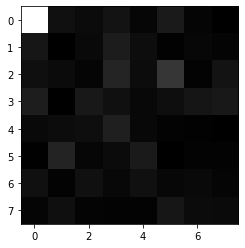

In [21]:
plt.imshow(np.fabs(V), cmap='gray')

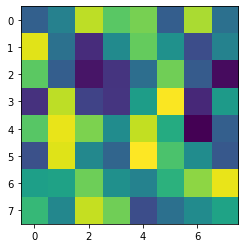

In [22]:
plt.imshow(X)

In [23]:
U = c.T @ V @ c

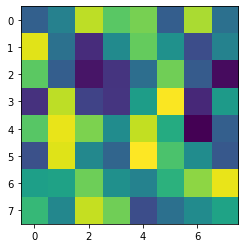

In [24]:
plt.imshow(U)

### reconstruction error

In [25]:
def PSNR(U, X):
    mse =  ((U-X)**2).sum() / (X.shape[0]*X.shape[1])**2
    psnr = 10*np.log10(255**2 / mse)
    print ('mse = ', mse, 'psnr = ', psnr)

In [26]:
PSNR(U, X)

mse =  1.4993253876082829e-28 psnr =  326.3718446604


### quantization

In [27]:
vv = V.copy()
vv[4:,4:] = 0

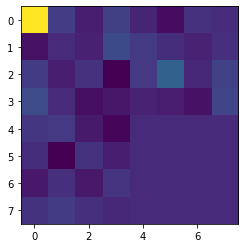

In [28]:
plt.imshow(vv)

In [29]:
uu = c.T @ vv @ c

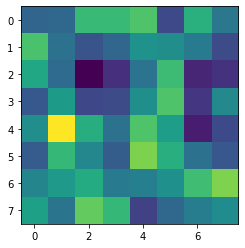

In [30]:
plt.imshow (uu)

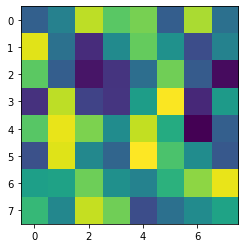

In [31]:
plt.imshow(X)

In [32]:
PSNR(uu, X)

mse =  8.35701798856426 psnr =  38.91029023876543


* 보통 30dB 가 넘으면 두 영상의 차이를 눈으로 구분하기 어려운 정도이다.
* 두 영상의 차이가 없다면 분모가 0이 되어서 PSNR은 매우 큰 값이 된다.
* 모든 영상을 대표하는 표준 시그널 파워가 없으므로 255의 제곱으로 시그널파워를 대신한다.

## Using Simple Cosine Function

In [33]:
N = 8
N2 = N *2
coefs = []
for u in range(N):
    a = []
    if u == 0:
        for i in range(N): # time index
            a.append( 1 )
    else:
        period = N2 / u
        for i in range(N): # time index
            a.append( np.cos(2*np.pi*i / period) )
    coefs.append (a)
#
coefs = np.array(coefs)

In [34]:
coefs

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  9.23879533e-01,  7.07106781e-01,
         3.82683432e-01,  6.12323400e-17, -3.82683432e-01,
        -7.07106781e-01, -9.23879533e-01],
       [ 1.00000000e+00,  7.07106781e-01,  6.12323400e-17,
        -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
        -1.83697020e-16,  7.07106781e-01],
       [ 1.00000000e+00,  3.82683432e-01, -7.07106781e-01,
        -9.23879533e-01, -1.83697020e-16,  9.23879533e-01,
         7.07106781e-01, -3.82683432e-01],
       [ 1.00000000e+00,  6.12323400e-17, -1.00000000e+00,
        -1.83697020e-16,  1.00000000e+00,  3.06161700e-16,
        -1.00000000e+00, -4.28626380e-16],
       [ 1.00000000e+00, -3.82683432e-01, -7.07106781e-01,
         9.23879533e-01,  3.06161700e-16, -9.23879533e-01,
         7.07106781e-01,  3.82683432e-01],
       [ 1.00000000e+00, -7.071067

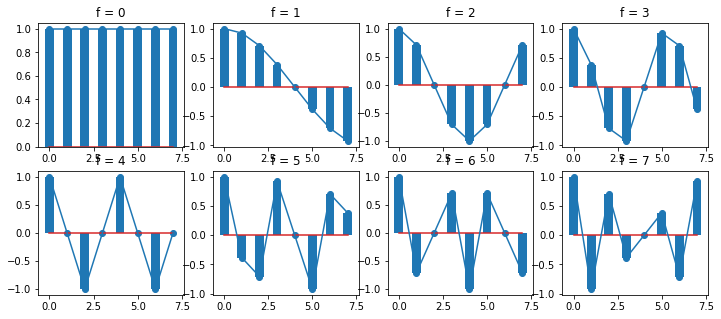

In [35]:
xaxis = np.arange(N)
fig, axes = plt.subplots(2,4, figsize=(12,5))
for i, ax in zip(range(N), axes.ravel()):
    ax.stem(xaxis, coefs[i], use_line_collection=True)
    ax.bar(xaxis, coefs[i], width=.5)
    ax.set_title ('f = {}'.format(i))
    ax.plot(xaxis, coefs[i])

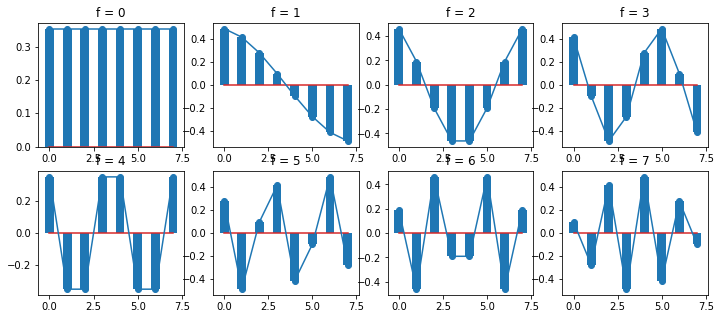

In [36]:
xaxis = np.arange(N)
fig, axes = plt.subplots(2,4, figsize=(12,5))
for i, ax in zip(range(N), axes.ravel()):
    ax.stem(xaxis, c[i], use_line_collection=True)
    ax.bar(xaxis, c[i], width=.5)
    ax.set_title ('f = {}'.format(i))
    ax.plot(xaxis, c[i])

In [37]:
def pltsig(sig):
    xaxis = np.arange(N)
    fig, axes = plt.subplots(2,4, figsize=(12,5))
    for i, ax in zip(range(N), axes.ravel()):
        ax.stem(xaxis, sig[i], use_line_collection=True)
        ax.bar(xaxis, sig[i], width=.5)
        ax.set_title ('f = {}'.format(i))
        ax.plot(xaxis, sig[i])

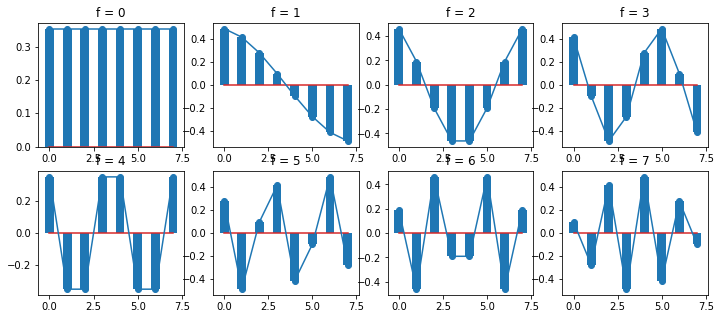

In [38]:
pltsig(c)

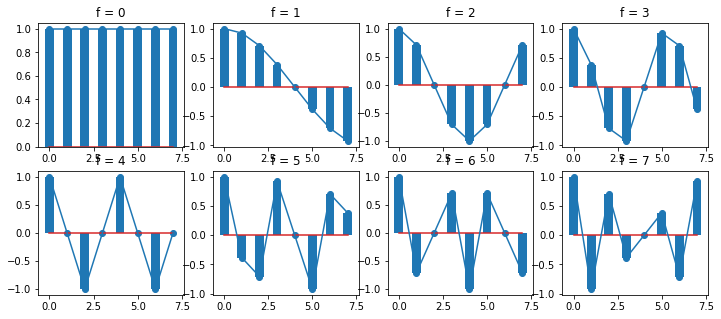

In [39]:
pltsig(coefs)

### Cosine coefficient for DCT
- double period
- half pixel shift

In [40]:
coefs2 = []
for u in range(N):
    a = []
    if u == 0:
        for i in range(N): # time index
            a.append( 1 )
    else:
        period = N2 / u
        for i in range(N): # time index
            a.append( np.cos(2*np.pi*(i+.5) / period) )
    coefs2.append (a)
#
coefs2 = np.array(coefs2)

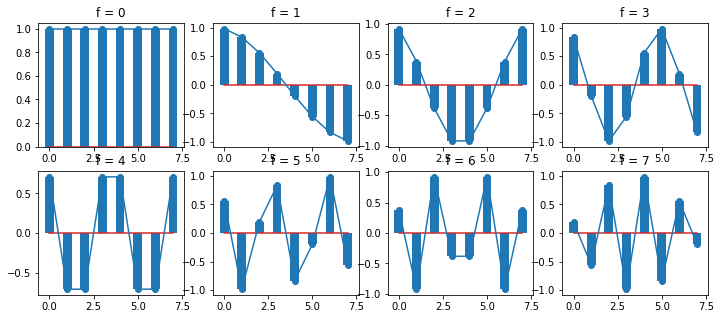

In [41]:
pltsig(coefs2)

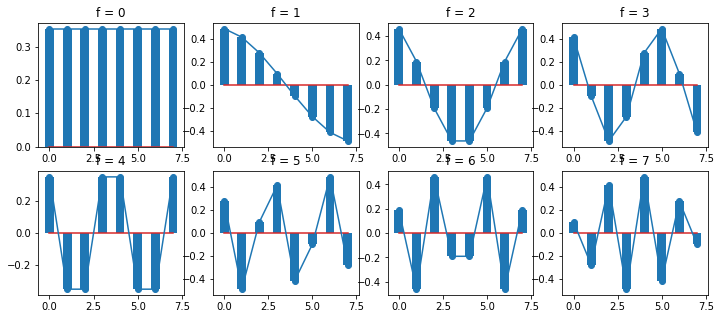

In [42]:
pltsig(c)

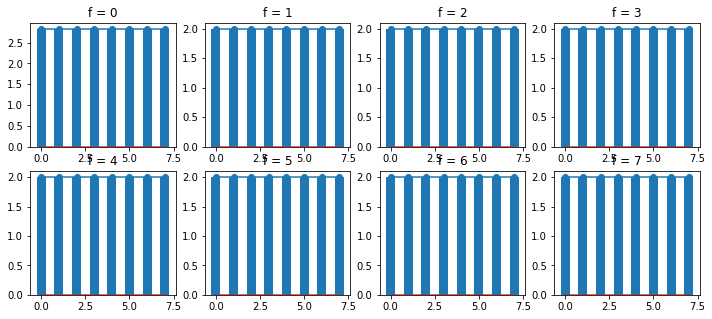

In [43]:
pltsig(coefs2/c)

## Exercise
1. load an image
2. for each 8x8 block of the image, apply DCT using the matrix formulation
3. use only DC term and reconstruct + visual inspection
4. use half of the coefficients and reconstruct
    - how to choose half of them?
        1. vertically half
        2. horizontally half
        3. diagnoaly half (zig-zag)